In [48]:
import pandas as pd
import numpy as np
import datetime as datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt


#file names

calender_file_name = 'calendar.csv'
listings_file_name = 'listings.csv'
review_file_name = 'reviews.csv'

reviews = pd.read_csv(review_file_name)
listings = pd.read_csv(listings_file_name)
calendar = pd.read_csv(calender_file_name)

In [49]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

# Exploratory Data Analysis

In the below section, I will be probing the dataset to select the questions I will be considering


In [50]:
calendar.head(20)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


Calendar seems to show the listing name, availability, and the price for each day

In [51]:
calendar['listing_id'].value_counts().keys()

Int64Index([12898806, 14710769,  7018497,  3946215,   951473,  5718921,
             3278624, 13624476,  9626428, 12175961,
            ...
              973695,  6181230, 10434883,  5026613, 14340601, 13951039,
            13512551,  5270703,   901914,  3250739],
           dtype='int64', length=3585)

We have around 3600 listings

In [52]:
listings.head(20)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.70
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,10.0,f,NaN,NaN,f,moderate,t,t,2,2.38
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,5.36
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...,9.0,f,NaN,NaN,f,strict,f,f,2,1.01


Listings has a large number of columns, outputted below. Let's see if the ID here matches the calendar listing_id

In [53]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [54]:
reviews.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [55]:
calendar_ids = sorted(calendar['listing_id'].value_counts().keys().tolist())
review_ids = sorted(reviews['listing_id'].value_counts().keys().tolist())
listing_ids = sorted(listings['id'].value_counts().keys().tolist())

In [56]:
print(len(calendar_ids))
print(len(review_ids))
print(len(listing_ids))

3585
2829
3585


# Calendar & Listing have the same number of listings. Meaning Not all units have reviews; up to around 20% 
We might be able to leverage the number of reviews a unit has (or lack thereof) to understand occupancy

In [57]:
reviews['comments'][0]

"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)"

In [58]:
listings['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [59]:
listings['city'].value_counts()


Boston                       3381
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Charlestown                    15
Brighton                       15
Dorchester                     15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
East Boston                     3
Mattapan                        3
Jamaica Plain                   2
South Boston                    2
Boston, Massachusetts, US       2
Hyde Park                       2
Jamaica Plain, Boston           2
ALLSTON                         2
Boston (Charlestown)            1
Jamaica Plain (Boston)          1
Newton                          1
South End, Boston               1
Milton                          1
Watertown                       1
Jamaica plain                   1
Jamaica Plain, MA               1
dorchester, bo

# Possible features:
### 1) Number of reviews
### 2) Average number of words per comment\n
### 3)Number of repeat visits
### 4) Description length
### 5) Cancellation policy

# Questions to look at 
#### 1) relationship between number/length of reviews and % of listed dates available
#### 2) % of vacancies by time of year (Best time to list)
#### 3) Relationship between availability and price of rental




In [61]:
# Creating the features
#1) number of reviews
#create df holding number of reviews, and merge it with the listing
review_count = reviews.groupby('listing_id')['comments'].count()


#2) Average number of words per comment
reviews['word_count'] = reviews['comments'].apply(lambda x: len(x.split(' ')) if type(x) == str else 0)
#review_word_count = reviews.groupby('listing_id')['word_count'].average()

#3) Repeat visits - gathered from number of repeated reviews

def calculate_repeat_visits(listing_id,reviews_df = reviews, listing_id_column_in_reviews_df = 'listing_id'):
    '''For 'listing_id' == 1178162, should return 1'''
    
    return reviews_df[reviews_df[listing_id_column_in_reviews_df] == listing_id]['reviewer_id'].count() - reviews_df[reviews_df[listing_id_column_in_reviews_df] == listing_id]['reviewer_id'].nunique()
listings['number of repeat visits'] = listings['id'].apply(lambda x: calculate_repeat_visits(x))

#4) Description length in words

listings['Description_length'] = listings['description'].apply(lambda x: len(x.split(' ')) if type(x) == str else 0)

#5) Cancellation policy

cancellation_policy = pd.get_dummies(listings['cancellation_policy'],drop_first = False)
listings = pd.concat([listings.loc[:,listings.columns != 'cancellation_policy'],cancellation_policy],axis = 1)




# Questions to look at 
#### 1) relationship between number/length of reviews and % of listed dates available
#### 2) % of vacancies by time of year (Best time to list)
#### 3) Relationship between availability and price of rental

In [62]:
#### 1) relationship between number/length of reviews and % of listed dates available
#to gather this info, we need the % of dates available.
calendar.loc[:,'available'] = calendar['available'].apply(lambda x: 1 if x == 't' else 0)

def get_pct_available_from_calendar_for_an_id( _id,calendar = calendar):
    return 100*calendar[calendar['listing_id']==_id]['available'].mean()

listings['% available'] = listings['id'].apply(lambda x: get_pct_available_from_calendar_for_an_id( _id = x, calendar = calendar))



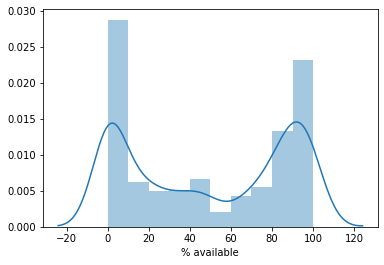

In [63]:
sns.distplot(listings['% available'])

In [84]:
numerical_listings = listings.loc[:,listings.dtypes != object]
#drop any column that is all NAs
numerical_listings.dropna(axis = 1, how = 'all',inplace = True)

<ipython-input-84-75f071cfc656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_listings.dropna(axis = 1, how = 'all',inplace = True)


In [95]:
numerical_listings.columns
columns_to_investigate = [ 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'number of repeat visits', 'Description_length',
       'flexible', 'moderate', 'strict', 'super_strict_30', '% available']

flexible                         -0.206135
square_feet                      -0.171845
review_scores_value              -0.108443
review_scores_accuracy           -0.091225
review_scores_location           -0.088293
review_scores_communication      -0.084527
review_scores_rating             -0.082632
review_scores_checkin            -0.060917
moderate                         -0.032441
review_scores_cleanliness        -0.024346
maximum_nights                    0.015370
minimum_nights                    0.021936
bedrooms                          0.028642
reviews_per_month                 0.042458
bathrooms                         0.053503
accommodates                      0.056993
beds                              0.057344
guests_included                   0.071025
calculated_host_listings_count    0.077176
number of repeat visits           0.104134
strict                            0.159601
Description_length                0.161719
super_strict_30                   0.179662
number_of_r

# What are the biggest factors that influence how often a listing is available?

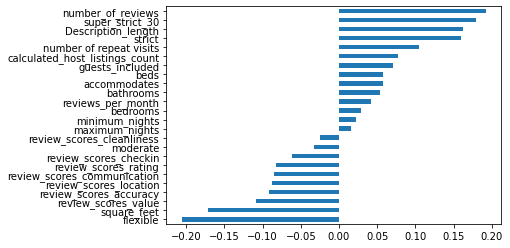

In [112]:
numerical_listings[columns_to_investigate].corr()['% available'].drop('% available').sort_values().plot(kind = 'barh')

This graph tells us that the number of reviews, having a strict cancellation policy, and a long description for your listing, are the off-putting to rentals! Leading to a higher rate of vacancy for a listing.
On the other hand, a flexible booking policy, a higher square foot-age (duh!) and a high review score for accuracy, seem to have the most positive effect on getting people to rent your property/

Features that didn't swing heavily either way were 
 1) Minimum nights
 2) Maximum nights
 3) Number of bedrooms
 4) Number of bathrooms.

# Question 2!
# What is the Best time to list?
By looking at the listing date, and the % of rentals that were vacant, in combination with the number of listed rentals, we can get a good idea of when there's a surge in rental activity in Boston!


In [121]:
calendar.head(10)

,listing_id,date,available,price,mm_dd
0,12147973,2017-09-05,0,NaN,09-05
1,12147973,2017-09-04,0,NaN,09-04
2,12147973,2017-09-03,0,NaN,09-03
3,12147973,2017-09-02,0,NaN,09-02
4,12147973,2017-09-01,0,NaN,09-01
5,12147973,2017-08-31,0,NaN,08-31
6,12147973,2017-08-30,0,NaN,08-30
7,12147973,2017-08-29,0,NaN,08-29
8,12147973,2017-08-28,0,NaN,08-28
9,12147973,2017-08-27,0,NaN,08-27


In [116]:
print('Start date of dataset is {}\n End date of dataset is {}'.format(calendar.date.min(),calendar.date.max()))

Start date of dataset is 2016-09-06
 End date of dataset is 2017-09-05


In [119]:
calendar['mm_dd'] = calendar['date'].apply(lambda x: str(x.split('-')[1])+'-' +str(x.split('-')[2]))

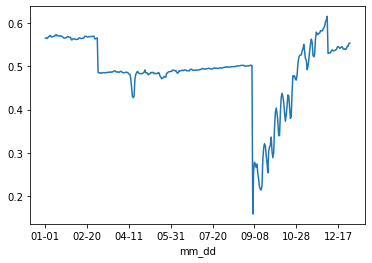

In [124]:
calendar.groupby(by = 'mm_dd')['available'].mean().plot()

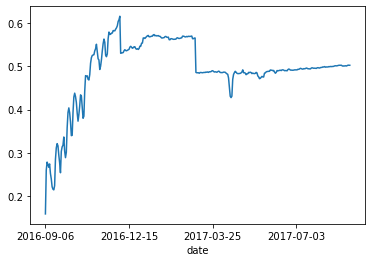

In [129]:
fig, ax = plt.subplots(1)
ax.locator_params(axis='x', nbins=6)
calendar.groupby(by = 'date')['available'].mean().plot(ax = ax)

# It seems like the winter isn't a great time to be leasing!
But the winter in Boston is so cold! Anyone could've told you that.
Let's look at the relationship between The rental prices and the calendar year

/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


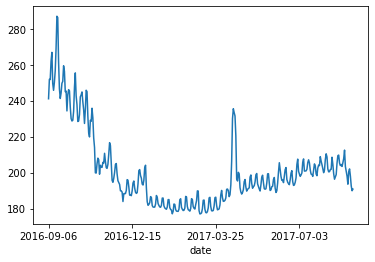

In [147]:
vacant = calendar[calendar['available']== 1]
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: x.replace('$',''))
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: x.replace(',',''))
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: int(x.split('.')[0]))



fig, ax = plt.subplots(1)
ax.locator_params(axis='x', nbins=6)
vacant.groupby(by = 'date')['price'].mean().plot(ax = ax)

In [144]:
vacant[vacant['available']== 1]['price'].max()

7163

It looks like there's one particular weekend where the availability drops, and the price skyrockets!
Let's see what weekend that is